<a href="https://colab.research.google.com/github/shreyashganvir77/Learn.MachineLearning.python/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Librabries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the Dataset.

In [32]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, [3, 4]].values

Using the Elbow Method to find the number of Clusters.

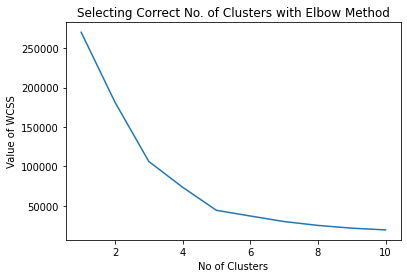

In [33]:
# The Elbow method is used to select perfect no of clusters for the dataset.
# The Elbow method calculated the WCSS for different no of Clusters from 1-10.
# The point where there is less decrease from the previous compared and through the curve the elbow point can be seen that point is selected.

from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
  kMeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
  kMeans.fit(x)
  WCSS.append(kMeans.inertia_)
plt.plot(range(1, 11), WCSS)
plt.xlabel('No of Clusters')
plt.ylabel('Value of WCSS')
plt.title('Selecting Correct No. of Clusters with Elbow Method')
plt.show()

Training the KMeans Model on the whole Dataset.

In [34]:
# The KMeans is a UnSupervised type of learning where do no know what to Predict.
# In KMeans Algorithm first no of clusters are selected in which data has to be divided.
# Then points are selected for this number of clusters as centroids.
# This Centroids then selects the neighboring points which are closer to the centroids.
# Then, the points which are selected. These points are used to point the new centroid and again previous step is followed for selecting the closest point.
# Once after marking of the centroid, all of points are within the closest centroids and algorithm is finished and we get the final Model.

kMeans = KMeans(n_clusters = 5,init = 'k-means++', random_state = 42)
y_kMeans = kMeans.fit_predict(x)
print(y_kMeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


Visualizing the Results.

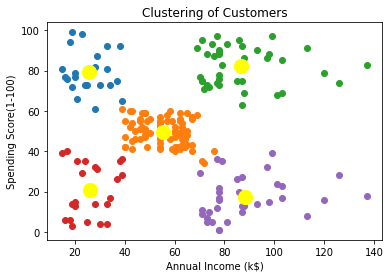

In [38]:
# For Visualizing the results we plot the clusters using the y_kMeans array for selecting the particular customers in the Dataset.

plt.scatter(x[y_kMeans==0, 0], x[y_kMeans==0, 1])
plt.scatter(x[y_kMeans==1, 0], x[y_kMeans==1, 1])
plt.scatter(x[y_kMeans==2, 0], x[y_kMeans==2, 1])
plt.scatter(x[y_kMeans==3, 0], x[y_kMeans==3, 1])
plt.scatter(x[y_kMeans==4, 0], x[y_kMeans==4, 1])
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1], s = 200, c='yellow', label = 'Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.title('Clustering of Customers')
plt.show()